## Multicollinearity

- It describes the state where the independent variables used in the linear regression model show strong relationship with each other

- Basically strong correlation between the independent variables - positive or negative direction

### How to detect multicollinearity

#### `Correlation Coefficient`

#### `Variance Inflation Factor`

### Variance Inflation Factor

- Its another approach to detect multicollinearity
- It directly measures the ratio of the variance of the entire model to the variance of a model with only one feature in question


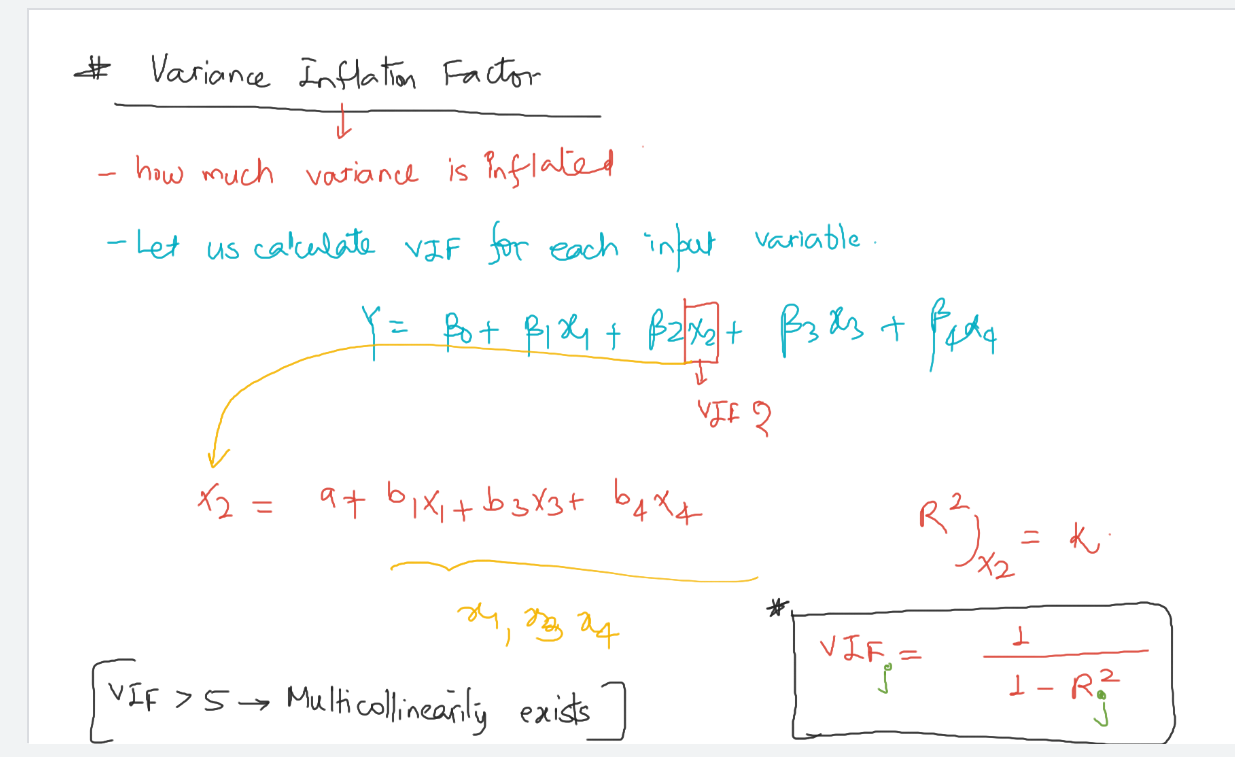

In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
### Load the data set
df_car = pd.read_csv("Car_sales.csv")

In [4]:
df_car.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation Coefficient Heatmap

In [7]:
mask= np.triu(np.ones_like(df_car.corr(), dtype=bool)) #mask the upper triangle

In [24]:
df_car.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [25]:
df_car.dropna(inplace=True)

In [26]:
df_car.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

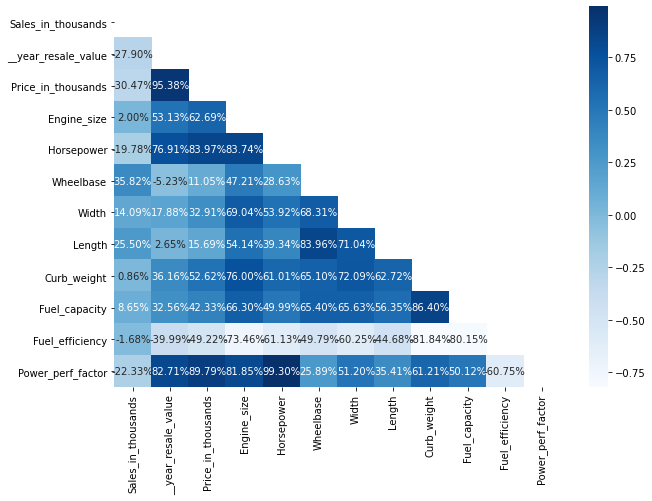

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df_car.corr(), mask=mask, annot=True, fmt='.2%', cmap='Blues')
plt.show()

- Power_perf_factor and Horsepower - 99.30%

- Fuel_Efficiency and Engine_Size -  81.85%

### Let us compute the VIF

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [28]:
def cal_vif(features):
    
    X = df_car[features]
    X['intercept']=1 #need this to calculate the VIF
    
    ### create an empty dataframe to store VIF values
    vif = pd.DataFrame()
    
    vif['variable'] = X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
    vif = vif[vif['variable']!='intercept']
    
    return vif
    

### TASK: GO THROUGH THE CODE AND UNDERSTAND IT 

In [29]:
df_car.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [30]:
### Features to consider removing 

features = ['Fuel_efficiency','Power_perf_factor','Engine_size','Curb_weight','Fuel_capacity','Horsepower']

In [31]:
cal_vif(features).sort_values('VIF', ascending=False)

<ipython-input-28-610feb551245>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept']=1 #need this to calculate the VIF


,variable,VIF
5,Horsepower,111.471081
1,Power_perf_factor,97.177100
2,Engine_size,6.721330
3,Curb_weight,5.353387
4,Fuel_capacity,4.282718
0,Fuel_efficiency,4.004185


In [32]:
### Features to consider removing 

features_after_removing_hp = ['Fuel_efficiency','Power_perf_factor','Engine_size','Curb_weight','Fuel_capacity']

In [33]:
cal_vif(features_after_removing_hp).sort_values('VIF', ascending=False)

<ipython-input-28-610feb551245>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept']=1 #need this to calculate the VIF


,variable,VIF
2,Engine_size,5.208420
3,Curb_weight,5.200252
4,Fuel_capacity,4.281471
0,Fuel_efficiency,4.001535
1,Power_perf_factor,3.447764


In [34]:
### Features to consider removing 

features_drop_power = ['Fuel_efficiency','Engine_size','Curb_weight','Fuel_capacity','Horsepower']

In [35]:
cal_vif(features_drop_power).sort_values('VIF', ascending=False)

<ipython-input-28-610feb551245>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept']=1 #need this to calculate the VIF


,variable,VIF
1,Engine_size,5.911721
2,Curb_weight,5.208810
3,Fuel_capacity,4.282568
0,Fuel_efficiency,4.002007
4,Horsepower,3.954903


In [36]:
### Features to consider removing 

features_drop_curb = ['Fuel_efficiency','Power_perf_factor','Engine_size','Fuel_capacity','Horsepower']

In [37]:
cal_vif(features_drop_curb).sort_values('VIF', ascending=False)

<ipython-input-28-610feb551245>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept']=1 #need this to calculate the VIF


,variable,VIF
4,Horsepower,108.282423
1,Power_perf_factor,94.552660
2,Engine_size,5.989121
0,Fuel_efficiency,3.792162
3,Fuel_capacity,2.975104


In [38]:
df_car.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [41]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    flo

In [42]:
### Features to consider removing 

features_all= ['Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']

In [43]:
cal_vif(features_all).sort_values('VIF', ascending=False)

<ipython-input-28-610feb551245>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept']=1 #need this to calculate the VIF


,variable,VIF
1,Horsepower,136.033316
8,Power_perf_factor,122.349489
5,Curb_weight,7.535679
0,Engine_size,7.088609
4,Length,5.846872
2,Wheelbase,5.658296
6,Fuel_capacity,5.259072
7,Fuel_efficiency,4.479305
3,Width,3.337064


**K-FOLD VALIDATION WILL BE DISCUSSED IN Decision Tree Class**

In [45]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
